# Finance Data Project 

In this data project I focused on exploratory data analysis of stock prices. The objective of the project is to practice  visualization and pandas skills and is not meant to be a robust financial analysis or be taken as financial advice.
I'm interested in seeing how bank stops progressed throughout the financial crisis (https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

I got the data from Google Finance.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to read stock information directly from the internet (http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

I focused on stock information from Jan 1st 2006 to Jan 1st 2016 for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for more information. **

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.  I ended up having to use "yahoo" because google api deprecated.

In [24]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [25]:
# Bank of America 
BAC = data.DataReader("BAC", "yahoo", start, end)

# CitiGroup
C = data.DataReader("C", "yahoo", start, end)

# Goldman Sachs
GS = data.DataReader("GS", "yahoo", start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", "yahoo", start, end)

# Morgan Stanley
MS = data.DataReader("MS", "yahoo", start, end)

# Wells Fargo
WFC = data.DataReader("WFC", "yahoo", start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order.**

In [26]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** I used pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks and set the keys argument equal to the tickers list.**

In [27]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 1, keys=tickers)

In [28]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [29]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   35.717861  493.799988  481.100006  490.000000  492.899994   
2006-01-04   35.338535  491.000000  483.500000  488.600006  483.799988   
2006-01-05   35.384048  487.799988  484.000000  484.399994  486.200012   
2006-01-06   35.330940  489.000000  482.000000  488.799988  486.200012   
2006-01-09   35.353695  487.399994  483.000000  486.000000  483.899994   

Bank Ticker    ...             MS                                         WFC  \
Stock Info     ...           Open      Close     Volume  Adj Close       High   
Date           ...                                                              
2006-01-03     ...      57.169998  58.310001  5377000.0  38.006454  31.975000   
2006-01-04     ...      58.700001  58.349998  7977800.0  38.032536  31.820000   
2006-01-05     ...      58.549999  58.509998  5778000.0  38.136818  31.555000   
2006-01-06     ...      58.770000  58.570000  6889800.0  38.175922  31.775000   
2006-01-09     ...      58.630001  59.189999  4144500.0  38.580029  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  21.045347  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.801256  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.778162  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.900213  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.896914  

[5 rows x 36 columns]

# EDA

** First, I looked at the max Close price for each bank's stock throughout the time period.**

In [30]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Next I created a new empty dataframe called returns. This dataframe will contain the returns for each bank's stock. Returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [31]:
returns = pd.DataFrame()

** I used pandas pct_change() method on the Close column to create a column representing this return value and constructed a for loop that goes through each Bank Stock Ticker and populates a Return column in the dataframe.**

In [32]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [33]:
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

** Next I created a pairplot using Seaborn of the returns dataframe to see which stock(s) stands out.**

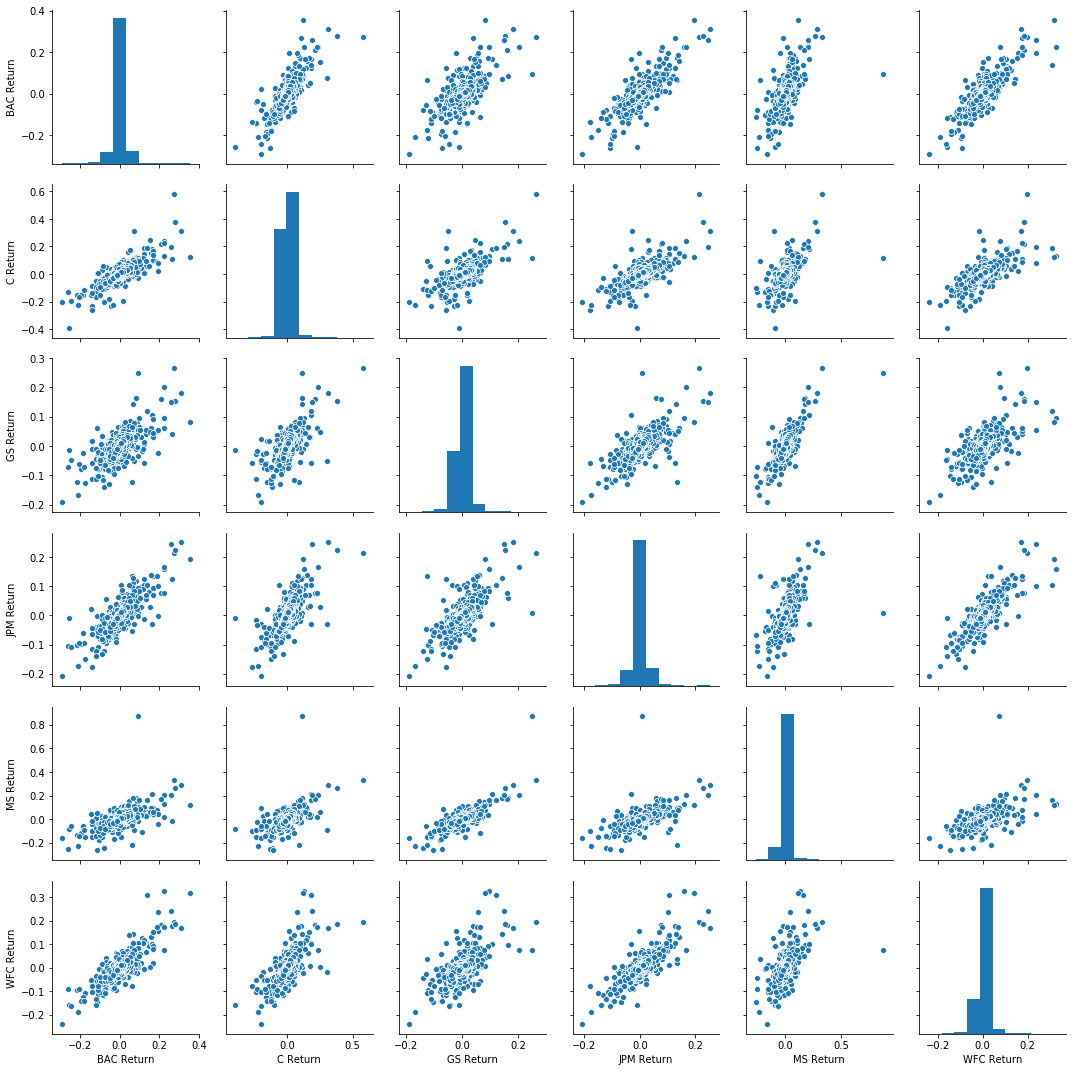

In [34]:
import seaborn as sns
sns.pairplot(returns[1:])  # Won't have data for first day in dataframe, because it doesn't have previous day to compare to

** Using this returns DataFrame, I then wanted to figure out on what dates each bank stock had the best and worst single day returns.**

In [36]:
returns.idxmin()

# Observation:  Four of the banks share the same date for the worst stock returns:  Bankd of America, Goldman Sachs, JP Morgan Chase and Wells Fargo

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [40]:
returns.idxmax()

# Observation:  Citigroup and Goldman Sachs share the same date for the highest return, but if you look at the days they had their lowest return above, they didn't enjoy it for very long
# JP Morgan had it's highest return and lowest return within a 24 hour period, and Morgan Stanley experienced something similar; however, theirs was within a 4 day period

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** To identify the riskiest stock during this time period, I started by looking at the overall standard deviation of their returns.**

In [41]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [47]:
returns.loc['2015-01-01':'2015-12-31'].std()
# Observation:  Focusing in on 2015, and comparing it to the overall standard deviation, all stocks noticed quite a swing, but Morgan Stanley appears to have felt the largest change.

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

____
# More Visualization


### Imports

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

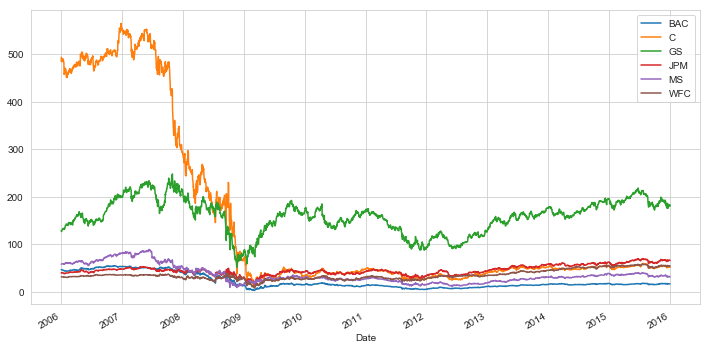

In [58]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,6))
plt.legend()

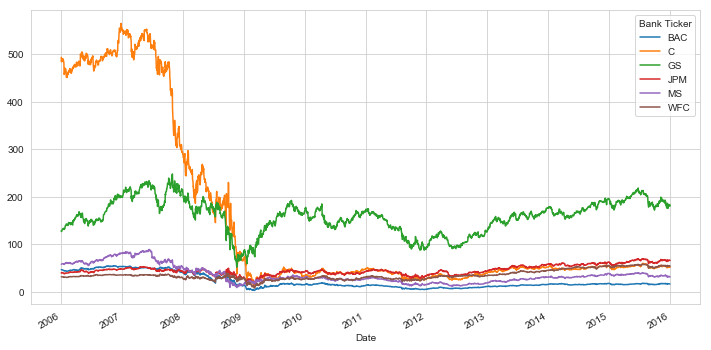

In [62]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,6))

## Moving Averages

Next I analyzed the moving averages for these stocks in the year 2008, plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.**

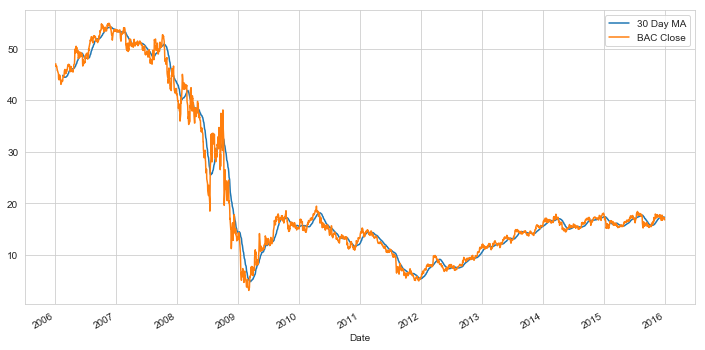

In [64]:
BAC['Close'].loc['2006-01-01':'2016-01-01'].rolling(window=30).mean().plot(label='30 Day MA', figsize=(12,6))
BAC['Close'].loc['2006-01-01':'2016-01-01'].plot(label = 'BAC Close',figsize=(12,6))
plt.legend()

** Next I created a heatmap of the correlation between the stocks Close Price.**

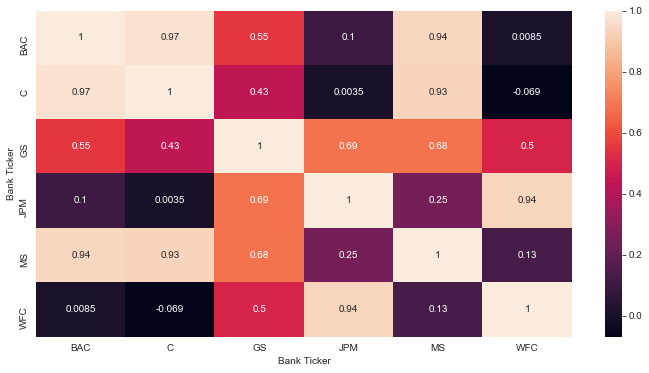

In [67]:
plt.figure(figsize=(12,6))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

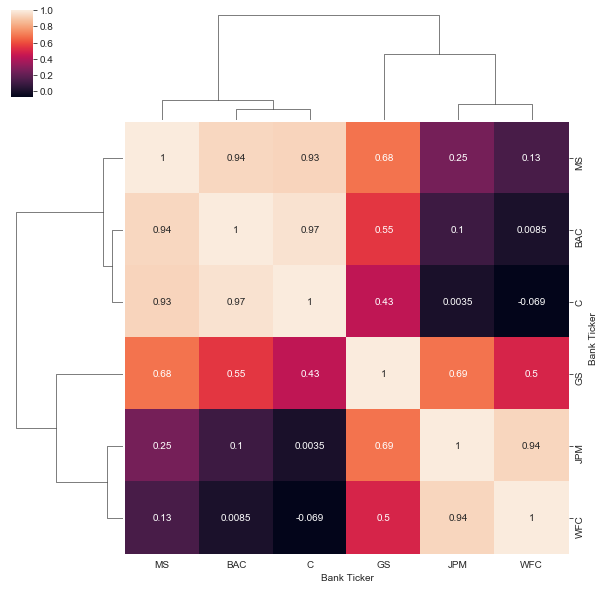

In [69]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Part 2 (Optional)

In this second part of the project I relied on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

In [76]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

In [75]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

** Candle Plot Bank of America for the year 2015 **

In [81]:
bac_candle = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2015-12-31']
bac_candle.iplot(kind='candle')
#have to drill in by selecting areas to see the "candles"

** Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [79]:
MS['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='sma',periods=[13,21,55])  #13,21,and 55 are common technical analysis periods

** Bollinger Band Plot for Bank of America for the year 2015.**

In [80]:
BAC['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='boll')   #shows uppper and lower bands along with the moving average